# Examples for DA fitting (updated for tlossmin)

This notebook gives an overview of python functions implemented for the analysis of dynamic aperture data from SixDesk.

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sixdesk.da as da
import time

In [2]:
import math
from scipy.integrate import nquad

In [3]:
# a = {}
# exda = {}
# ioct = 0
# seeds = np.arange(1,61).tolist()

# for chroma in np.arange(0,8,2):
#     a[chroma,ioct]= da.davst('/home/phermes/development/SixDeskDB/chrom-{0:2.1f}-{1:2.1f}.db'.format(chroma,ioct),
#                      emit=2.2)
# #     print("chroma {0} | ioct {1}".format(chroma,ioct), end='\r',flush=True)
#     a[chroma,ioct].fit(seeds,gradient=0.8)
#     exda[chroma,ioct] = a[chroma,ioct].extrapolate(11245*60*30)

In [5]:
# a[0,0].errors

In [22]:
# seed=25
# seeds = np.arange(1,61).tolist()

# b = da.davst('/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db',emit=2.5)
# b.fit(seed,gradient=0.8)
# exda = b.extrapolate(11245*60*30)
# # 

In [6]:
def plot_comparison(name,seed):

    fig = plt.figure(figsize=(12,8))
    plt.title("blabla")

    
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(223)
    ax4 = plt.subplot(224)


    b = da.davst(name,emit=2.5)
    b.fit(seed,gradient=0.8)
    exda = b.extrapolate(11245*60*30)

    d,bb,k,_,_,_ = b._fit_parameters_dict[seed]
    turns =  np.arange(500,100000, 1000)
    daval =  da.davst_function(turns,d,bb,k)
    ax1.plot(b.cleaned_data['tlossmin'],b.cleaned_data['dawsimp'],'o')
    ax1.plot(turns,daval)
    turns =  np.arange(500,11245*60*30,10000)
    daval =  da.davst_function(turns,d,bb,k)
    ax4.plot(turns,daval, label="tlossmin")

    # plt.show()

    c = da.davst(name,emit=2.5)
    c.fit(seed,gradient=0.8,xaxis='nturn')
    exda = c.extrapolate(11245*60*30)


    d,bb,k,_,_,_ = c._fit_parameters_dict[seed]
    turns =  np.arange(500,100000, 1000)
    daval =  da.davst_function(turns,d,bb,k)
    ax2.plot(c.cleaned_data['nturn'],c.cleaned_data['dawsimp'],'o')
    ax2.plot(turns,daval)
    ax3.scatter(b.cleaned_data['tlossmin'], c.cleaned_data['nturn'])

    turns =  np.arange(500,11245*60*30, 10000)
    daval =  da.davst_function(turns,d,bb,k)
    ax4.plot(turns,daval, label="nturn")
    ax1.set_xlabel("tlossmin")
    ax1.set_ylabel("DA [sigma]")
    ax2.set_xlabel("nturn")
    ax3.set_xlabel("tlossmin")
    ax3.set_ylabel("nturn")
    ax4.set_xlabel("turn")
    ax4.set_ylabel("DA")
    ax4.legend()
    

    plt.show()

['Curvature problem for seed 3',
 'Curvature problem for seed 8',
 'Curvature problem for seed 10',
 'Curvature problem for seed 16',
 'Curvature problem for seed 18',
 'Curvature problem for seed 24',
 'Curvature problem for seed 32',
 'Curvature problem for seed 34',
 'Curvature problem for seed 44',
 'Curvature problem for seed 54',
 'Curvature problem for seed 60']

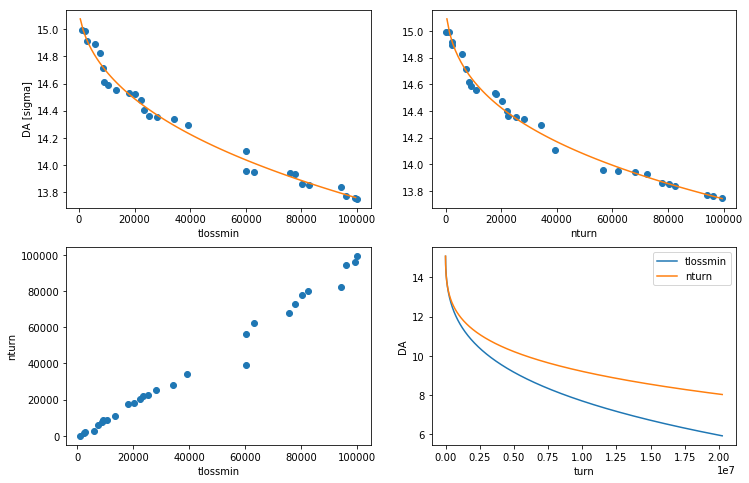

In [7]:
plot_comparison("/home/phermes/development/SixDeskDB/ats2017_b1_QP_0_IOCT_0.db",1)

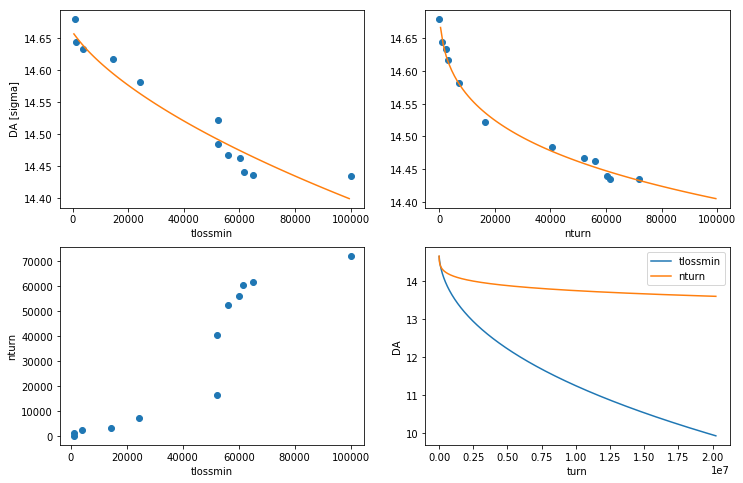

In [8]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db",25)

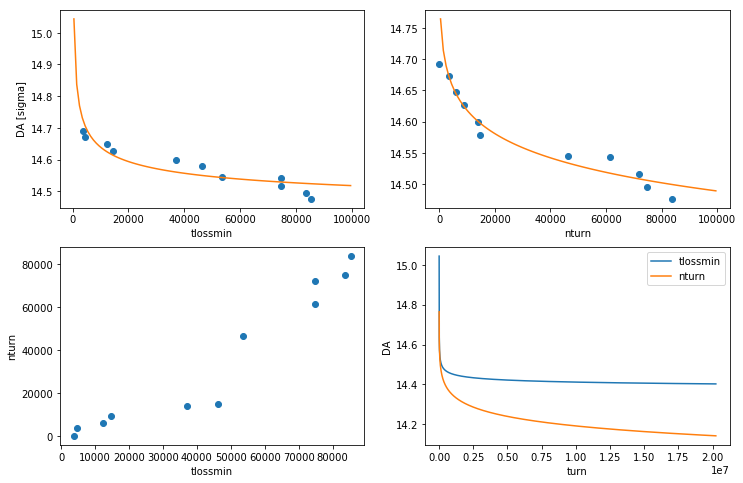

In [9]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-0.0-0.0.db",8)

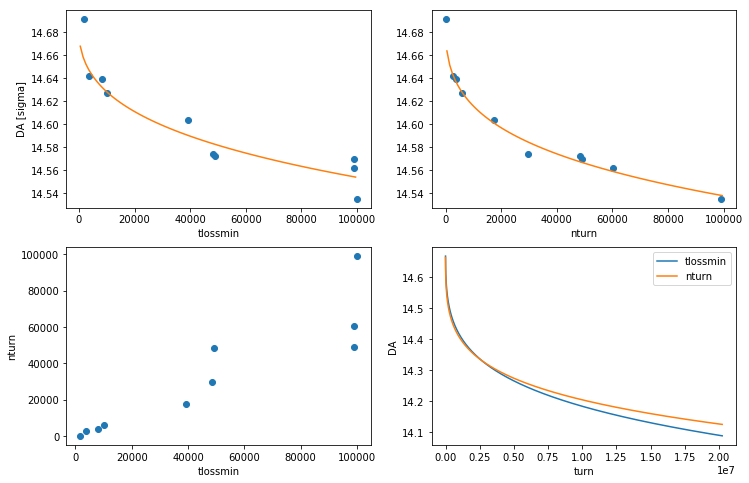

In [10]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db",2)

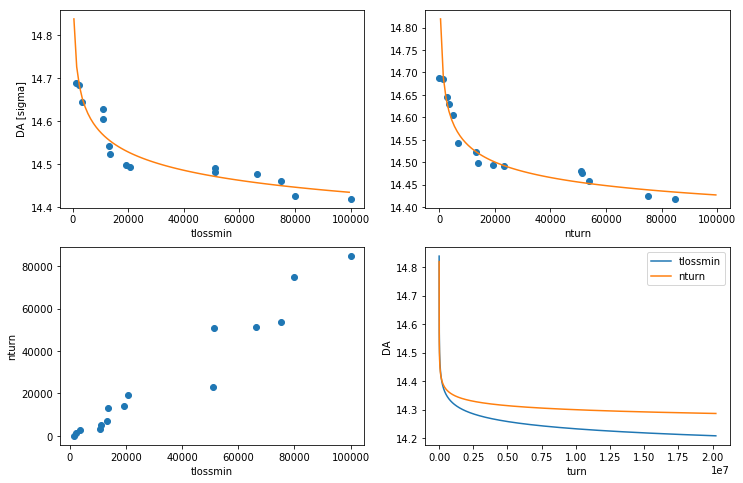

In [11]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db",1)

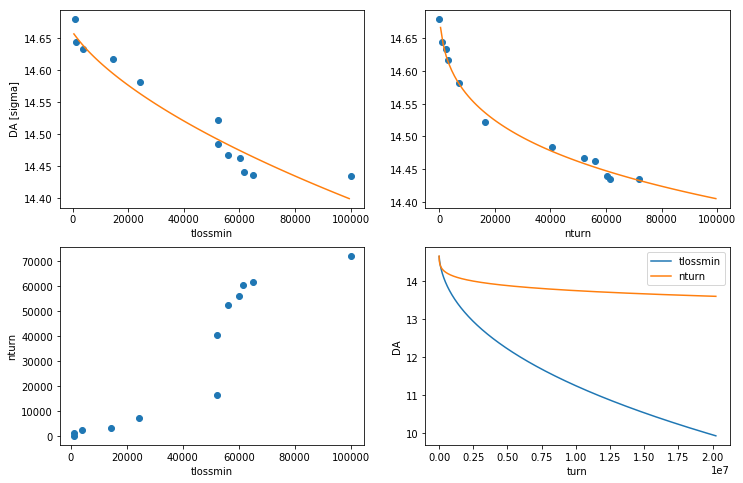

In [12]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db",25)

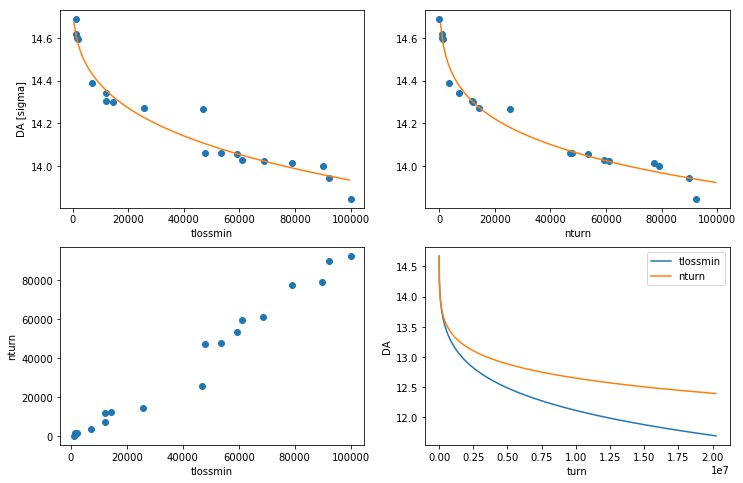

In [13]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-20.0-0.0.db",5)

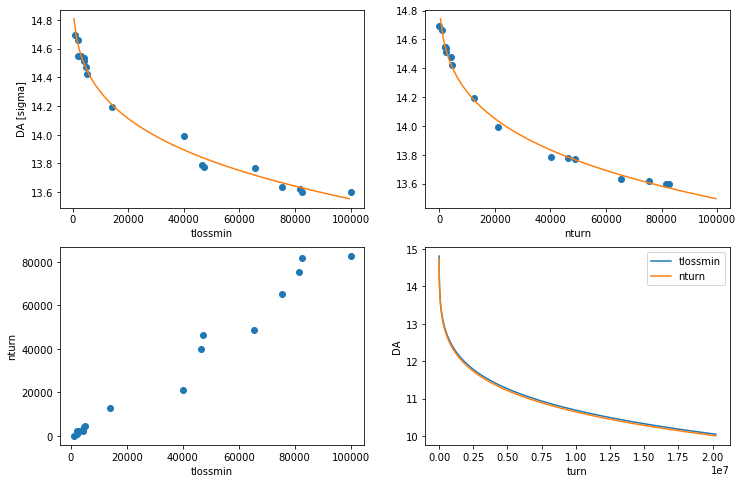

In [14]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-20.0-0.0.db",10)

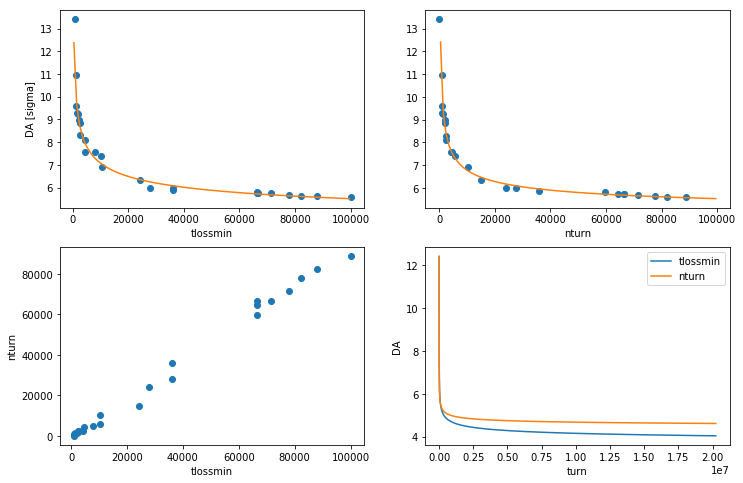

In [15]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-20.0-40.0.db",13)

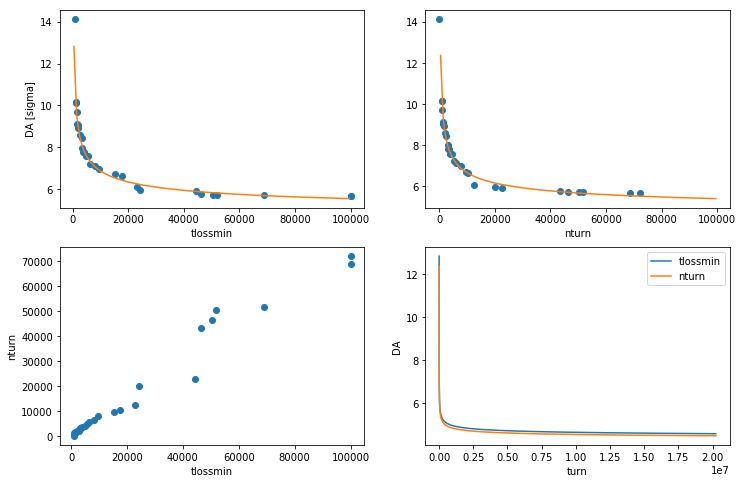

In [16]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-20.0-40.0.db",1)